In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/media/hp/New Volume/DBDA/DBDA 2023/ML/Assignment/East_std.csv')

In [30]:
df.describe()

,index,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,1999.000000,0.043172,0.012927,0.264879,0.007252,0.003063,0.065020,0.134906,0.014929,0.025917,0.496330,0.370343
std,1154.556192,0.059112,0.069399,0.344230,0.073825,0.048810,0.091590,0.111672,0.045436,0.071569,0.248991,0.482957
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,999.500000,0.010868,0.000000,0.000000,0.000000,0.000000,0.004741,0.034884,0.000000,0.000000,0.280685,0.000000
50%,1999.000000,0.025279,0.000000,0.000000,0.000000,0.000000,0.027195,0.139535,0.000000,0.000000,0.493610,0.000000
75%,2998.500000,0.054201,0.000000,0.500000,0.000000,0.000000,0.090261,0.197674,0.010092,0.018868,0.697914,1.000000
max,3998.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
df.columns

Index(['index', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

In [56]:
df.shape
df

,index,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


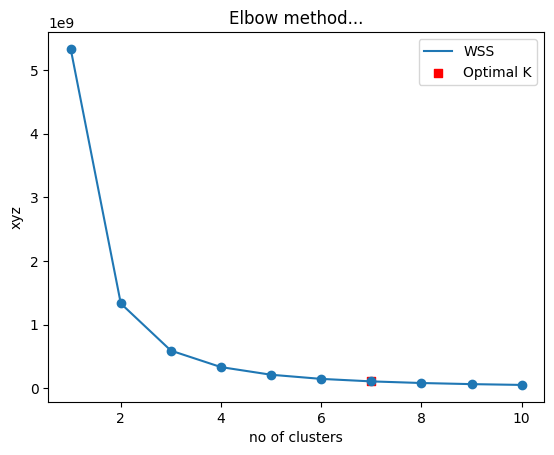

In [61]:
from sklearn.cluster import KMeans

num_of_clusters = np.arange(1,11)
wss = []
for k in num_of_clusters:
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(df)
    wss.append(kmeans.inertia_)
    
plt.plot(num_of_clusters, wss, label ='WSS')
plt.scatter(num_of_clusters[6],wss[6], color='red', label ='Optimal K', marker="s")
plt.scatter(num_of_clusters, wss)
plt.xlabel("no of clusters")
plt.ylabel("xyz")
plt.title('Elbow method...')
plt.legend()
plt.show()


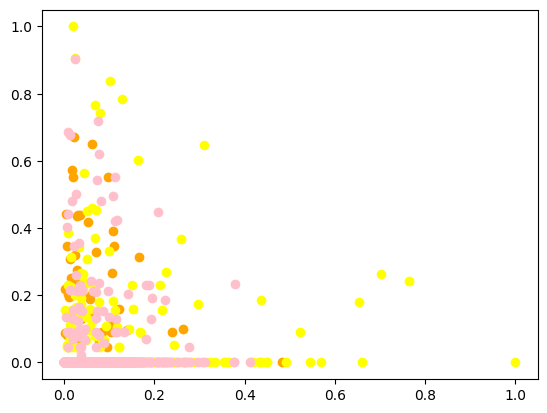

In [48]:
plt.scatter(df['Balance'][kmeans.labels_ ==0],df['Qual_miles'][kmeans.labels_ ==0],color ='orange')

plt.scatter(df['Balance'][kmeans.labels_ ==1],df['Qual_miles'][kmeans.labels_ ==1],color ='yellow')

plt.scatter(df['Balance'][kmeans.labels_ ==2],df['Qual_miles'][kmeans.labels_ ==2],color ='pink')
plt.scatter(df['Balance'][kmeans.labels_ ==3],df['Qual_miles'][kmeans.labels_ ==3],color ='blue')


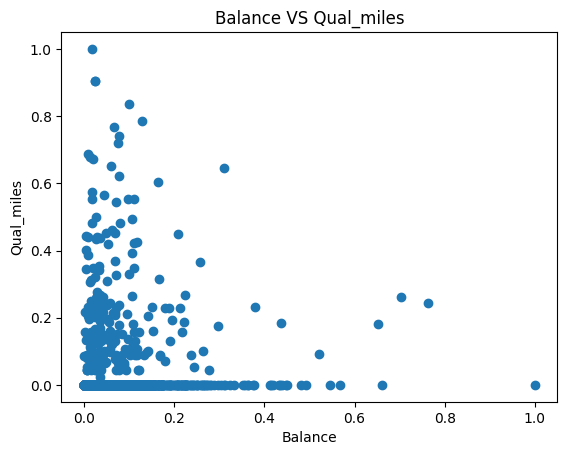

In [49]:
plt.scatter(df['Balance'],df['Qual_miles'])
plt.title('Balance VS Qual_miles')
plt.xlabel('Balance')
plt.ylabel('Qual_miles')
plt.show()

In [50]:
kmeans = KMeans(n_clusters=4, random_state=123)
kmeans.fit(df)

KMeans(n_clusters=4, random_state=123)

In [51]:
kmeans.labels_

array([1, 1, 1, ..., 3, 3, 3], dtype=int32)

In [52]:
kmeans.cluster_centers_

array([[2.51100000e+03, 3.97246563e-02, 1.23506842e-02, 2.52512563e-01,
        8.54271357e-03, 3.26633166e-03, 5.92096726e-02, 1.30746757e-01,
        1.29601507e-02, 2.29449132e-02, 3.69195871e-01, 3.72864322e-01],
       [5.04500000e+02, 6.46015714e-02, 1.41190357e-02, 3.61138614e-01,
        5.44554455e-03, 3.46534653e-03, 8.97956777e-02, 1.57103385e-01,
        1.72805803e-02, 3.20754717e-02, 8.23091487e-01, 4.67326733e-01],
       [1.51150000e+03, 4.37165417e-02, 1.41801827e-02, 2.99800797e-01,
        6.47410359e-03, 4.23306773e-03, 7.17504293e-02, 1.40438247e-01,
        1.49636390e-02, 2.53138390e-02, 5.84099339e-01, 4.03386454e-01],
       [3.50350000e+03, 2.42221658e-02, 1.10207747e-02, 1.43686869e-01,
        8.58585859e-03, 1.26262626e-03, 3.87585968e-02, 1.10829222e-01,
        1.44721053e-02, 2.32323232e-02, 2.01732176e-01, 2.35353535e-01]])

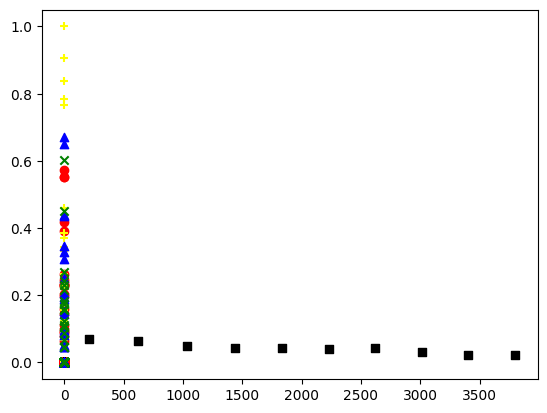

In [62]:
list = [('red',0,'o'),
       ('yellow',1,'+'),
        ('blue',2,'^'),
        ('green',3,'x')]

for color, index, marker in list:
    plt.scatter(df['Balance'][kmeans.labels_ == index],
               df['Qual_miles'][kmeans.labels_ ==index],
               color = color, marker = marker)
    
for i in range(0,len(kmeans.cluster_centers_)):
      plt.scatter(kmeans.cluster_centers_[i][0],kmeans.cluster_centers_[i][1],color="black", marker="s")

plt.show()